In [1]:
import sys
from pathlib import Path

sys.path.append(str(Path().resolve().parent))

# 1. Data load and split

In [2]:
from src.data_split import load_data_and_config

df, cfg = load_data_and_config()

In [3]:
df

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,num_baskets,total_spent,total_items,...,most_common_product_type,most_common_garment_group,most_common_colour_master,most_common_department,most_common_index_group,most_common_index,most_common_graph_appearance,most_common_prod_name,most_common_color_group,most_common_color_value
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,10,648.98303,21,...,Blazer,Jersey Fancy,Black,Suit,Ladieswear,Ladieswear,Solid,Mariette Blazer,Black,Dark
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...,23,2601.93210,86,...,Bikini top,Swimwear,Blue,Swimwear,Ladieswear,Lingeries/Tights,Solid,Timeless Midrise Brief,Black,Dark
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,7,704.77966,18,...,Sweater,Blouses,Black,Blouse,Ladieswear,Ladieswear,Solid,Atlanta Push Body Harlow,Black,Dark
3,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...,6,469.69492,13,...,Underwear body,Jersey Fancy,Black,Functional Lingerie,Ladieswear,Ladieswear,Solid,Jacket Slim,Black,Dark
4,00007d2de826758b65a93dd24ce629ed66842531df6699...,1.0,1.0,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...,16,3823.61000,120,...,Bra,"Under-, Nightwear",Black,Expressive Lingerie,Ladieswear,Lingeries/Tights,Solid,Croydon unitard,Black,Dark
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617318,ffff61677073258d461e043cc9ed4ed97be5617a920640...,1.0,1.0,ACTIVE,Regularly,32.0,f22bd5702242c63a4d40c169e9c45564b933fa5093ea80...,17,809.62714,32,...,Blouse,Jersey Fancy,Black,Jersey,Ladieswear,Ladieswear,Solid,VIOLET COLD SHOULDER,Black,Dark
617319,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,NaN,NaN,ACTIVE,NONE,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...,11,1292.35600,51,...,Underwear bottom,"Under-, Nightwear",Black,Swimwear,Ladieswear,Lingeries/Tights,Solid,New Girl Wide Side Tanga,Black,Dark
617320,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,NaN,NaN,ACTIVE,NONE,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...,19,1807.32200,84,...,T-shirt,Jersey Basic,Pink,Basic 1,Divided,Divided,Solid,Brit Baby Tee,Light Pink,Dusty Light
617321,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...,19,788.93220,45,...,Trousers,Jersey Fancy,Black,Tops Fancy Jersey,Ladieswear,Divided,Solid,Cool tiebelt dressed,Black,Dark


In [3]:
from src.data_split import split_data

X_tr, X_val, X_te, y_tr, y_val, y_te = split_data(df, cfg)

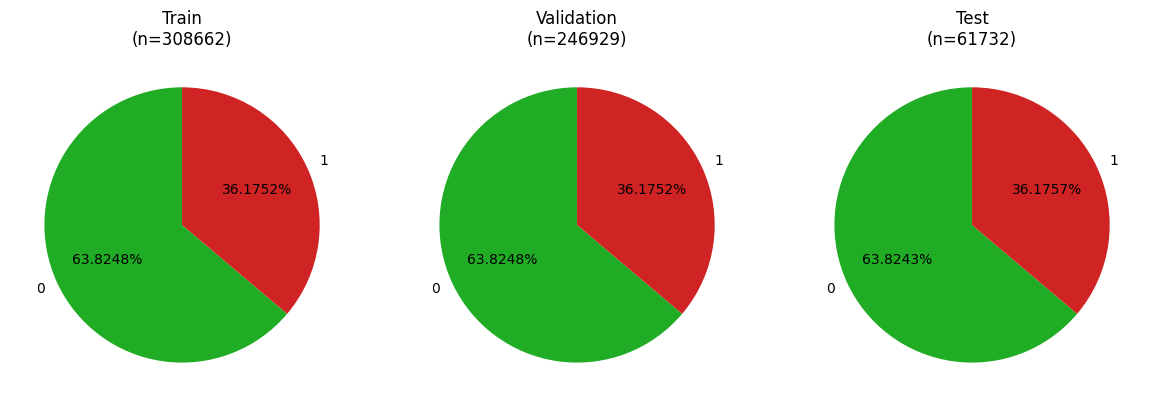

In [4]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

datasets = [("Train", y_tr), ("Validation", y_val), ("Test", y_te)]
colors = ["#21ac26", "#d02424"]

for ax, (title, y) in zip(axes, datasets):
    counts = y.value_counts(normalize=True).sort_index()
    labels = [str(cls) for cls in counts.index]
    ax.pie(
        counts,
        labels=labels,
        autopct="%.4f%%",
        startangle=90,
        colors=colors
    )
    ax.set_title(f"{title}\n(n={len(y)})")
plt.tight_layout()
plt.show()

In [5]:
# repo_root = Path().resolve().parent
# out_dir = repo_root / "data" / "split"
# out_dir.mkdir(parents=True, exist_ok=True)

# X_tr.to_csv(out_dir / "X_train.csv", index=False)
# y_tr.to_csv(out_dir / "y_train.csv", index=False)
# X_val.to_csv(out_dir / "X_val.csv", index=False)
# y_val.to_csv(out_dir / "y_val.csv", index=False)
# X_te.to_csv(out_dir / "X_test.csv", index=False)
# y_te.to_csv(out_dir / "y_test.csv", index=False)


# 2. Hyperparameter optimization

In [6]:
from src.bayes_search import load_split_data

X_train, y_train, X_val, y_val, X_test, y_test = load_split_data()

Split data path: data\split


In [7]:
from src.bayes_search import load_xgb_bayes_config

cfg, space = load_xgb_bayes_config()

print("Konfiguracja:", cfg)
print("Przestrzeń hiperparametrów:")
for param in space:
    print(param)

Konfiguracja: {'n_trials': 20, 'random_state': 42, 'early_stopping_rounds': 50, 'processed_dir': 'data/split', 'target_name': 'churn', 'objective_name': 'binary:logistic'}
Przestrzeń hiperparametrów:
{'name': 'max_depth', 'type': 'int', 'low': 3, 'high': 15, 'log': False}
{'name': 'max_bin', 'type': 'int', 'low': 64, 'high': 256, 'log': False}
{'name': 'eta', 'type': 'float', 'low': 0.01, 'high': 0.5, 'log': True}
{'name': 'subsample', 'type': 'float', 'low': 0.5, 'high': 1.0, 'log': False}
{'name': 'colsample_bytree', 'type': 'float', 'low': 0.5, 'high': 1.0, 'log': False}
{'name': 'min_child_weight', 'type': 'float', 'low': 1.0, 'high': 14.0, 'log': False}
{'name': 'gamma', 'type': 'float', 'low': 0.0, 'high': 8.0, 'log': False}
{'name': 'reg_lambda', 'type': 'float', 'low': 0.0001, 'high': 10.0, 'log': True}
{'name': 'reg_alpha', 'type': 'float', 'low': 0.0001, 'high': 10.0, 'log': True}
{'name': 'grow_policy', 'type': 'cat', 'values': ['depthwise', 'lossguide']}
{'name': 'booster',

In [8]:
from src.bayes_search import tune_xgb_hyperparams
best_params = tune_xgb_hyperparams(X_val, y_val, cfg, space)
print("Najlepsze hiperparametry:", best_params)

[trial 1/20] auc=0.890409 | best=0.890409 | params={'max_depth': np.int64(13), 'max_bin': np.int64(99), 'eta': 0.21118915966823948, 'subsample': 0.7984250789732436, 'colsample_bytree': 0.7229163764267956, 'min_child_weight': 2.299673905634038, 'gamma': 3.673991135726938, 'reg_lambda': 0.004661686413912771, 'reg_alpha': 0.0005180051644243022, 'grow_policy': 'lossguide', 'booster': 'gbtree', 'sampling_method': 'uniform'} | time=22.81s
[trial 2/20] auc=0.874991 | best=0.890409 | params={'max_depth': np.int64(14), 'max_bin': np.int64(64), 'eta': 0.4849954644251444, 'subsample': 0.8087407548138583, 'colsample_bytree': 0.8058265802441404, 'min_child_weight': 1.0918619678563264, 'gamma': 0.18449940033132609, 'reg_lambda': 0.042060390579019995, 'reg_alpha': 0.009984006580328664, 'grow_policy': 'depthwise', 'booster': 'dart', 'sampling_method': 'uniform'} | time=199.96s
[trial 3/20] auc=0.893967 | best=0.893967 | params={'max_depth': np.int64(4), 'max_bin': np.int64(183), 'eta': 0.0446469145331

# 3. Final training

In [ ]:
from src.model import xgb_train

booster = xgb_train(X_train, y_train, X_test, y_test, best_params, 
                    num_boost_round=500, early_stopping_rounds=100)



Rozpoczynam trening XGBoost...
[0]	train-auc:0.78377	test-auc:0.77475
[10]	train-auc:0.86973	test-auc:0.86398
[20]	train-auc:0.88855	test-auc:0.88095
[30]	train-auc:0.88873	test-auc:0.88021
[40]	train-auc:0.89067	test-auc:0.88137
[50]	train-auc:0.89300	test-auc:0.88362
[60]	train-auc:0.89400	test-auc:0.88480
[70]	train-auc:0.89531	test-auc:0.88592
[80]	train-auc:0.89468	test-auc:0.88509
[90]	train-auc:0.89510	test-auc:0.88515
[100]	train-auc:0.89611	test-auc:0.88632
[110]	train-auc:0.89699	test-auc:0.88696
[120]	train-auc:0.89741	test-auc:0.88719
[130]	train-auc:0.89805	test-auc:0.88769
[140]	train-auc:0.89813	test-auc:0.88752
[150]	train-auc:0.89831	test-auc:0.88740
[160]	train-auc:0.89904	test-auc:0.88831
[170]	train-auc:0.90036	test-auc:0.88975
[180]	train-auc:0.90073	test-auc:0.88994
[190]	train-auc:0.90145	test-auc:0.89068
[200]	train-auc:0.90193	test-auc:0.89108
[210]	train-auc:0.90247	test-auc:0.89153
[220]	train-auc:0.90284	test-auc:0.89172
[230]	train-auc:0.90317	test-auc:0.89

In [17]:
from pathlib import Path
import xgboost as xgb

repo_root = Path().resolve().parent
models_dir = repo_root / "models"
models_dir.mkdir(parents=True, exist_ok=True)

booster_path = models_dir / "xgb_booster.json"
booster.save_model(str(booster_path))

In [12]:
import pandas as pd

importance = booster.get_score(importance_type='weight')

importance_df = pd.DataFrame({
    'feature': list(importance.keys()),
    'importance': list(importance.values())
})

top10 = importance_df.sort_values(by='importance', ascending=False).head(10)
print(top10)


                      feature  importance
28        relationship_lenght      4081.0
38     most_common_department      2800.0
35   most_common_product_type      1626.0
33            dominant_season      1489.0
29              active_months      1468.0
4                         age      1213.0
5                 num_baskets      1158.0
42    most_common_color_group       681.0
24    unique_graph_appearance       666.0
37  most_common_colour_master       583.0
